# NLCD data for the North Fork Nooksack River Basin 

nlcd data file is used to produce cohesion minimum, mode, and maximum value fields as input for landslide probability modeling. 

In [1]:
import numpy as np
from landlab.io import read_esri_ascii

Matplotlib is building the font cache; this may take a moment.


 Landtype Classifications and Associated Numbers in the NLCD:

    0: "Unclassified",
    11: "Open Water",
    12: "Perennial Ice/Snow",
    21: "Developed, Open",
    22: "Developed, Low Intensity",
    23: "Developed, Medium Intensity",
    24: "Developed, High Intensity",
    31: "Barren Land (Rock/Sand/Clay)",
    41: "Deciduous Forest",
    42: "Evergreen Forest",
    43: "Mixed Forest",
    52: "Shrub/Scrub",
    71: "Grassland/Herbaceous",
    81: "Pasture/Hay",
    82: "Cultivated Crops",
    90: "Woody Wetlands",
    95: "Emergent Herbaceous Wetlands",

In [2]:
(lcmg, C) = read_esri_ascii('nlcd_30m.asc', name = 'landcover') 

Finding coverage percentages of the landtypes in the North Fork Nooksack River Basin

In [3]:

Unclassified = np.count_nonzero(np.where(C == 0))
print('% Unclassified nodes:', Unclassified)
Open_Water = np.round((np.count_nonzero(np.where(C == 11))/830781)*100, 3)
print('% Open_Water nodes:', Open_Water)
Perennial_Ice_Snow = np.round((np.count_nonzero(np.where(C == 12))/830781)*100,3)
print('% Perennial Ice/Snow nodes:', Perennial_Ice_Snow)
Developed_Open = np.round((np.count_nonzero(np.where(C == 21))/830781)*100,3)
print('% Developed_Open nodes:', Developed_Open)
Developed_Low_Intensity = np.round((np.count_nonzero(np.where(C == 22))/830781)*100,3)
print('% Developed_Low_Intensity nodes:', Developed_Low_Intensity)
Developed_Medium_Intensity = np.round((np.count_nonzero(np.where(C == 23))/830781)*100,3)
print('% Developed_Medium_Intensity nodes:', Developed_Medium_Intensity)
Developed_High_Intensity = np.round((np.count_nonzero(np.where(C == 24))/830781)*100,3)
print('% Developed_High_Intensity nodes:', Developed_High_Intensity)
BarrenLand_RockSandClay = np.round((np.count_nonzero(np.where(C == 31))/830781)*100,3)
print('% BarrenLand_RockSandClay nodes:', BarrenLand_RockSandClay)
Deciduous_Forest = np.round((np.count_nonzero(np.where(C == 41))/830781)*100,3)
print('% Deciduous_Forest nodes:', Deciduous_Forest)
Evergreen_Forest = np.round((np.count_nonzero(np.where(C == 42))/830781)*100,3)
print('% Evergreen_Forest nodes:', Evergreen_Forest)
Mixed_Forest = np.round((np.count_nonzero(np.where(C == 43))/830781)*100,3)
print('% Mixed_Forest nodes:', Mixed_Forest)
Shrub_Scrub = np.round((np.count_nonzero(np.where(C == 52))/830781)*100,3)
print('% Shrub_Scrub nodes:', Shrub_Scrub)
Grassland_Herbaceous = np.round((np.count_nonzero(np.where(C == 71))/830781)*100,3)
print('% Grassland_Herbaceous nodes:', Grassland_Herbaceous)
Pasture_Hay = np.round((np.count_nonzero(np.where(C == 81))/830781)*100,3)
print('% Pasture_Hay nodes:', Pasture_Hay)
Cultivated_Crops = np.round((np.count_nonzero(np.where(C == 82))/830781)*100,3)
print('% Cultivated_Crops nodes:', Cultivated_Crops)
Woody_Wetlands = np.round((np.count_nonzero(np.where(C == 90))/830781)*100,3)
print('% Woody_Wetlands nodes:', Woody_Wetlands)
Emergent_Herbaceous_Wetlands = np.round((np.count_nonzero(np.where(C == 95))/830781)*100,3)
print('% Emergent_Herbaceous_Wetlands nodes:', Emergent_Herbaceous_Wetlands)

% Unclassified nodes: 0
% Open_Water nodes: 0.372
% Perennial Ice/Snow nodes: 2.359
% Developed_Open nodes: 1.468
% Developed_Low_Intensity nodes: 0.558
% Developed_Medium_Intensity nodes: 0.085
% Developed_High_Intensity nodes: 0.033
% BarrenLand_RockSandClay nodes: 5.572
% Deciduous_Forest nodes: 2.28
% Evergreen_Forest nodes: 66.183
% Mixed_Forest nodes: 5.335
% Shrub_Scrub nodes: 11.777
% Grassland_Herbaceous nodes: 1.863
% Pasture_Hay nodes: 0.796
% Cultivated_Crops nodes: 0.001
% Woody_Wetlands nodes: 0.822
% Emergent_Herbaceous_Wetlands nodes: 0.495


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap
%matplotlib inline
import pylab
from landlab.plot.imshow import imshow_grid
from landlab.plot.imshow import imshow_grid_at_node
from numpy import savetxt

In [4]:
# function to create a new array based on the values associated with the land types in the nooksack dem for maping and to assign root cohesion values
def rootcohesion(C, nd, ow, pis, do, dl, dm, dh, bl, df, ef, mf, ss, glh, ph, cc, ww, ehw): 
    nC = []
    for i in C:
        if i == -9999: # No Data
            nC.append(nd)
        if i == 11:    # Open_water
            nC.append(ow)
        if i == 12:    # Perennial Ice/Snow
            nC.append(pis)
        if i == 21:    # Developed_Open
            nC.append(do)
        if i == 22:    # Developed_Low
            nC.append(dl)
        if i == 23:    # Developed_Medium
            nC.append(dm)
        if i == 24:    # Developed_high
            nC.append(dh)
        if i == 31:    # Barren Land
            nC.append(bl)
        if i == 41:    # Deciduous Forest
            nC.append(df)
        if i == 42:    # Evergreen Forest
            nC.append(ef)
        if i == 43:    # Mixed Forest
            nC.append(mf)
        if i == 52:    #Shrub/Scrub
            nC.append(ss)
        if i == 71:    # Grassland/herbaceous
            nC.append(glh)
        if i == 81:    # Pasture/Hay
            nC.append(ph)
        if i == 82:    # Cultivated Crops
            nC.append(cc)
        if i == 90:    # Woody Wetlands
            nC.append(ww)
        if i == 95:    # Emergent Herbaceous Wetlands
            nC.append(ehw)
    return nC

In [5]:
nC = rootcohesion(C,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16)

In [6]:
lcmg.add_field('node', 'landcovercolor', nC)

array([0, 0, 0, ..., 0, 0, 0])

Mapping the land classification distribution 

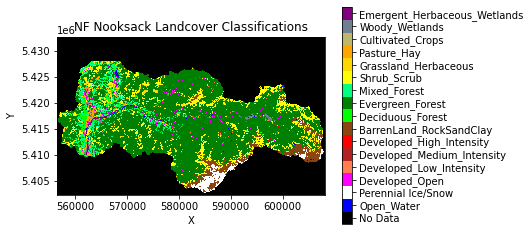

In [7]:
# Producing a basic color map locating the landuse types

imshow_grid(lcmg, 'landcovercolor', plot_name = 'NF Nooksack Landcover Classifications', 
            cmap = ListedColormap(['k',"blue", "white", "magenta", "coral", "firebrick",
                        "red", "saddlebrown", "lime", "green", "springgreen",
                        "yellow", "gold", "orange", "darkkhaki", "slategray",
                        "purple"], N=17), limits = (-0.5,16.5), allow_colorbar= False)
cb = plt.colorbar()
cb.set_ticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
cb.set_ticklabels(['No Data', 'Open_Water','Perennial Ice/Snow','Developed_Open','Developed_Low_Intensity','Developed_Medium_Intensity',
                  'Developed_High_Intensity','BarrenLand_RockSandClay', 'Deciduous_Forest','Evergreen_Forest','Mixed_Forest','Shrub_Scrub',
                  'Grassland_Herbaceous','Pasture_Hay','Cultivated_Crops','Woody_Wetlands','Emergent_Herbaceous_Wetlands'])
plt.show()

(5415000.0, 5420000.0)

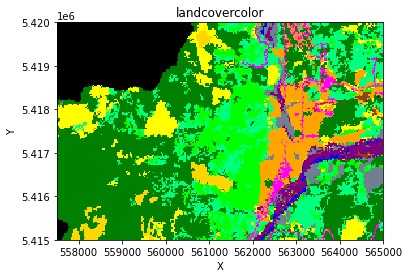

In [8]:
f, ax = plt.subplots()
imshow_grid_at_node(lcmg, 'landcovercolor', plot_name = 'NF Nooksack Landcover Classifications', 
            cmap = ListedColormap(['k',"blue", "white", "magenta", "coral", "firebrick",
                        "red", "saddlebrown", "lime", "green", "springgreen",
                        "yellow", "gold", "orange", "darkkhaki", "slategray",
                        "purple"], N =17), limits = (-0.5,16.5), allow_colorbar= False)
ax.set_xlim([557500, 565000])
ax.set_ylim([5.415*10**6, 5.420*10**6])

Using the nlcd dem to assign minimum, maximum, and mode cohesion values based on the four Root cohesion variables used in Ronda's Root Cohesion values table. 
Unit = kPa
* Barren/developed: min = 0.03, mode = 0.10, max = 0.15
    * Developed (open, low, medium, and high intensity), Barren Land, Perennial Ice/Snow, Open Water
* Forest(coniferous): min = 4, mode = 10, max = 20
    * Deciduous, Evergreen, and Mixed Forest
* Shrubland: min = 2, mode = 4, max = 10
    * Shrub/Scrub
* Herbaceous: min = 1, mode = 2, max = 5
    * Grassland/herbaceous, Pasture/Hay, Cultivated Crops
* Wetland: min = 3, mode = 6, max = 14
    * Woody Wetlands, Emergent Herbaceous Wetlands

In [9]:
C_min = rootcohesion(C,-9999.,0.03,0.03,0.03,0.03,0.03,0.03,0.03,4,4,4,2,1,1,1,3,3)

Saving C_min for landslide probability modeling:

In [32]:
savetxt('C_min.csv', C_min)

Mapping minimum cohesion values:

In [35]:
lcmg.add_field('node', 'soil__minimum_total_cohesion', C_min, clobber=True)

array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])

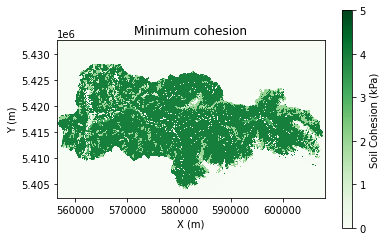

In [37]:
imshow_grid(lcmg,'soil__minimum_total_cohesion', plot_name = 'Minimum cohesion', 
            var_name = 'Soil Cohesion', var_units = 'kPa', grid_units = ('m','m'), 
            cmap = 'Greens',limits = (0, 5))

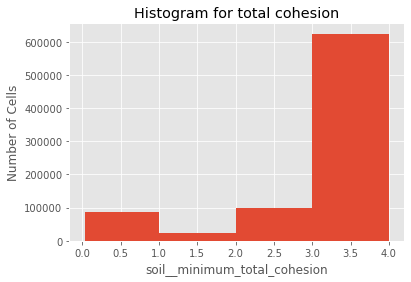

In [52]:
prob = lcmg.at_node['soil__minimum_total_cohesion']
plt.style.use('ggplot')
plt.hist(prob, bins=[0.03,1, 2,3,4])
plt.xlabel('soil__minimum_total_cohesion')
plt.ylabel ('Number of Cells')
plt.title('Histogram for total cohesion')
plt.show()

In [38]:
Cmode = rootcohesion(C,-9999.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,10,10,10,4,2,2,2,6,6)

Saving Cmode for landslide probability modeling:

In [39]:
savetxt('Cmode.csv', Cmode)

Mapping median cohesion values:

In [56]:
lcmg.add_field('node', 'soil__mode_total_cohesion', Cmode, clobber=True)

array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])

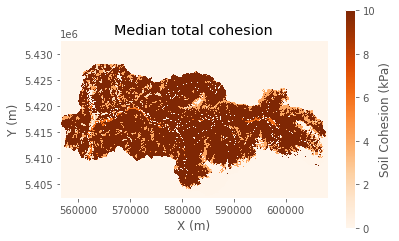

In [58]:
imshow_grid(lcmg,'soil__mode_total_cohesion', plot_name = 'Median total cohesion', 
            var_name = 'Soil Cohesion', var_units = 'kPa', grid_units = ('m','m'), 
            cmap = 'Oranges',limits = (0, 10))

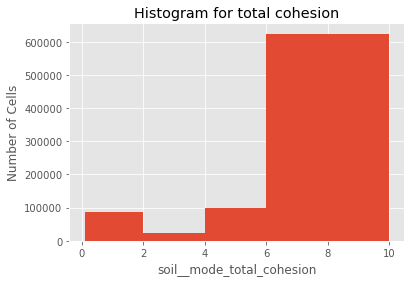

In [59]:
prob = lcmg.at_node['soil__mode_total_cohesion']
plt.style.use('ggplot')
plt.hist(prob, bins=[0.1,2,4,6,10])
plt.xlabel('soil__mode_total_cohesion')
plt.ylabel ('Number of Cells')
plt.title('Histogram for total cohesion')
plt.show()

In [47]:
C_max = rootcohesion(C,-9999.,0.15,0.15,0.15,0.15,0.15,0.15,0.15,20,20,20,10,5,5,5,14,14)

Saving C_max for landslide probability model input:

In [48]:
savetxt('C_max.csv', C_max)

Mapping maximum cohesion values:

In [49]:
lcmg.add_field('node', 'soil__maximum_total_cohesion', C_max, clobber=True)

array([-9999., -9999., -9999., ..., -9999., -9999., -9999.])

C:\Users\Valued Customer\anaconda3\lib\site-packages\landlab\plot\imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Purples").copy()
  cmap.set_bad(color=color_for_closed)


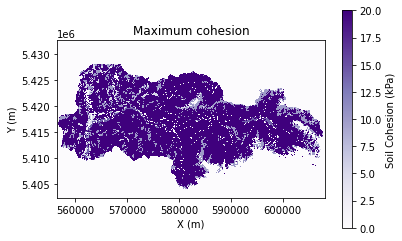

In [51]:
imshow_grid(lcmg,'soil__maximum_total_cohesion', plot_name = 'Maximum cohesion', 
            var_name = 'Soil Cohesion', var_units = 'kPa', grid_units = ('m','m'), 
            cmap = 'Purples',limits = (0, 20))

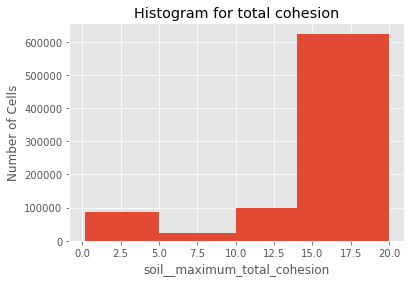

In [60]:
prob = lcmg.at_node['soil__maximum_total_cohesion']
plt.style.use('ggplot')
plt.hist(prob, bins=[0.15,5,10,14,20])
plt.xlabel('soil__maximum_total_cohesion')
plt.ylabel ('Number of Cells')
plt.title('Histogram for total cohesion')
plt.show()